Tải dataset và giải nén 

In [9]:
import numpy as np
import pandas as pd

In [10]:
import requests

url = "https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip"
zip_path = "dataset.zip"

response = requests.get(url, stream=True)
with open(zip_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)


In [11]:
import zipfile

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("dataset")


In [12]:
import os
os.remove(zip_path)

In [13]:
df = pd.read_csv(r"C:\Users\Hp X2 G3\Downloads\ds102\lab2\dataset\data.csv", sep = ';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Mã hóa biến mục tiêu targettarget

In [14]:
def encode_target(value : str) -> int:
    if value == 'Dropout' or value == 'Enrrolled':
        return 0
    return 1

Kiểm tra dữ liệu bị thiếu

In [15]:
df.isna().sum(axis = 0)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [18]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [19]:
df['Target'] = df['Target'].apply(encode_target)
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


Chuẩn hóa dữ liệu số

In [20]:
continuous_columns = [
    'Previous qualification (grade)',
    'Admission grade',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]
for column in continuous_columns:
    df[column] = (df[column] - df[column].mean())/df[column].std()

In [21]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,0.000000,0,-0.287606,0.124372,0.765674,0
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,6,6,6,13.666667,0,0.876123,-1.105097,0.347160,1
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,6,0,0,0.000000,0,-0.287606,0.124372,0.765674,0
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,6,10,5,12.400000,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,6,6,6,13.000000,0,0.876123,-1.105097,0.347160,1


In [22]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

Xác định các cột dạng phân loại

In [23]:
discrete_columns = [column for column in df.columns if column not in continuous_columns]

# Trực quan hóa dữ liệu

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

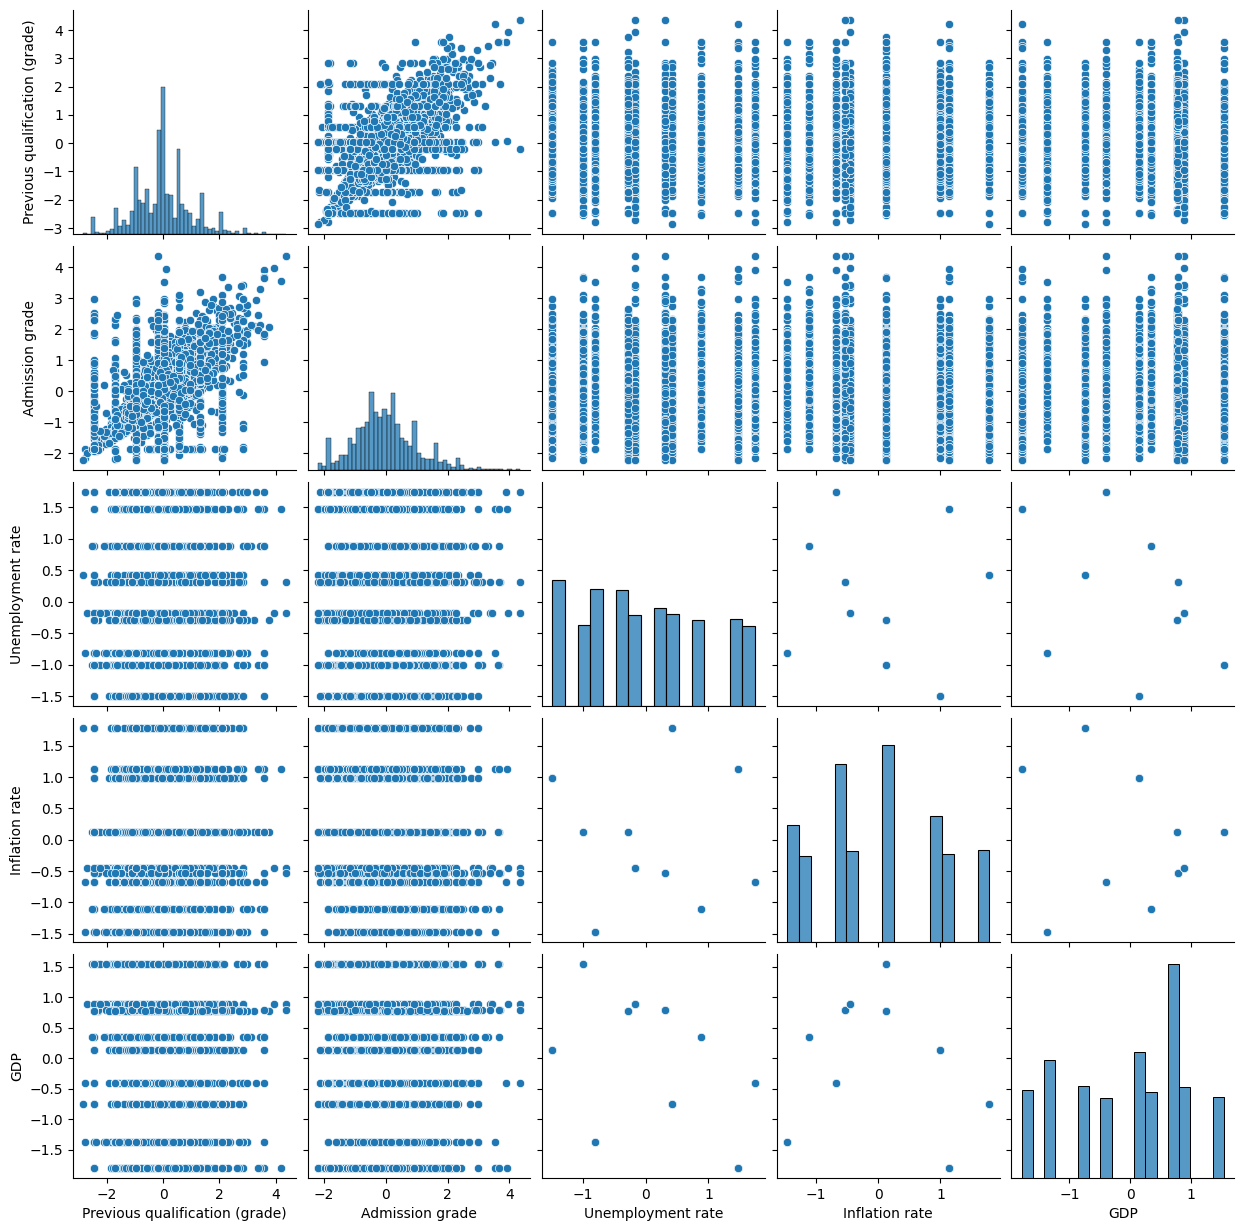

In [25]:
sns.pairplot(df[continuous_columns])
plt.show()

In [27]:
# ve ma tran tuong quan

In [26]:
cov = np.zeros((len(df.columns[:-1]), len(df.columns[:-1])))
for i, col_name_i in enumerate(df.columns[:-1]):
    for j, col_name_j in enumerate(df.columns[:-1]):
        cov[i, j] = np.corrcoef(df[col_name_i].to_numpy(), df[col_name_j].to_numpy())[0, 1]

In [28]:
plt.figure(figsize=(100, 100))
sns.heatmap(cov, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1], annot=cov)

C:\Users\Hp X2 G3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

C:\Users\Hp X2 G3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Hp X2 G3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


Xác định biến đầu vào và biến mục tiêu

In [29]:
X = df.iloc[:, :-1]
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,0,0.000000,0,-0.287606,0.124372,0.765674
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,0,6,6,6,13.666667,0,0.876123,-1.105097,0.347160
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,0,6,0,0,0.000000,0,-0.287606,0.124372,0.765674
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,0,6,10,5,12.400000,0,-0.813161,-1.466705,-1.375356
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,0,6,6,6,13.000000,0,0.876123,-1.105097,0.347160


In [30]:
y = df.iloc[:, -1]
y.value_counts()

Target
1    3003
0    1421
Name: count, dtype: int64

In [31]:
X = X.to_numpy()
X.shape

(4424, 36)

In [32]:
y = y.to_numpy().reshape(-1, 1)
y.shape

(4424, 1)

Chia tập dữ liệu train-dev-testtest

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Dev set: {X_dev.shape}, {y_dev.shape}")
print(f"Test set: , {X_test.shape}, {y_test.shape}")

Train set: (3539, 36), (3539, 1)
Dev set: (442, 36), (442, 1)
Test set: , (443, 36), (443, 1)


Xây dựng mô hình Logistic RegressionRegression

In [38]:
from tqdm import tqdm
class LogisticRegression:
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1/(1+np.exp(-z))
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9)).mean()

    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return np.mean(y == y_hat)
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n, d = X.shape
        self.theta = np.zeros((d, 1))

        def train_for_epochs(epochs):
            with tqdm(range(epochs)) as pb:
                for e in pb:
                    pb.set_description(f"Epoch {e+1}")
                    y_hat = self.predict_proba(X)

                    diff = y_hat - y
                    gradient = (1/n) * np.matmul(X.T, diff) 
                    self.theta -= self.lr * gradient

                    loss = self.loss_fn(y, y_hat)
                    acc = self.accuracy(y, (y_hat >= 0.5).astype(int))

                    pb.set_postfix({"loss": loss, "acc": acc})
                    self.losses.append(loss)  # Đảm bảo loss được lưu
                    self.metrics.append(acc)

        # Chạy epoch ban đầu
        train_for_epochs(self.epoch)

        while input("Train thêm 100 epoch? (y/n): ").lower() == "y":
            train_for_epochs(100)

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        z = np.matmul(X, self.theta) 
        return self.sigmoid(z)  # Dự đoán xác suất

    def predict(self, X: np.ndarray) -> np.ndarray:
        z = np.matmul(X, self.theta) # (n, 1)
        y_hat = self.sigmoid(z) # (n, 1)
        return y_hat

In [39]:
logistic_reg = LogisticRegression(500, 0.5)


In [40]:
logistic_reg.fit(X, y)

Epoch 3:   0%|          | 0/500 [00:00<?, ?it/s, loss=6.66, acc=0.679] C:\Users\Hp X2 G3\AppData\Local\Temp\ipykernel_6760\2106529981.py:10: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
Epoch 6:   0%|          | 0/500 [00:00<?, ?it/s, loss=6.66, acc=0.679]

Epoch 500: 100%|██████████| 500/500 [00:04<00:00, 116.83it/s, loss=6.64, acc=0.68] 


In [41]:
y_pred = logistic_reg.predict(X)

C:\Users\Hp X2 G3\AppData\Local\Temp\ipykernel_6760\2106529981.py:10: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [42]:
acc = logistic_reg.accuracy(y, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.3212


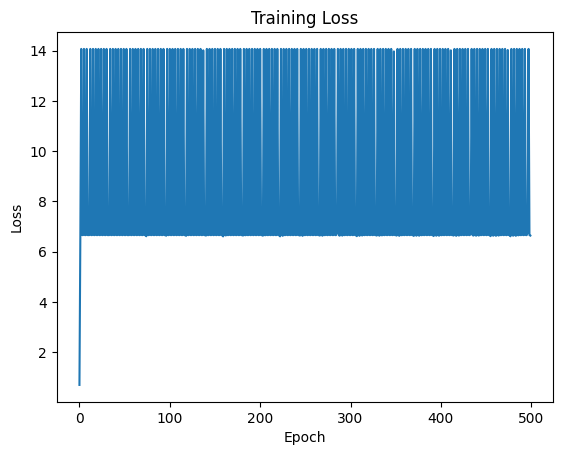

In [43]:
plt.plot(logistic_reg.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()